In [16]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [18]:
# CSV読み込み
df = pd.read_csv("data.csv", encoding="utf-8")

# SQLiteデータベースに接続・保存
db = sqlite3.connect("job_data.db")
df.to_sql("jobs", db, if_exists="replace", index=False)
print("DBに保存しました！")

DBに保存しました！


In [19]:
# SQL文を書く
query = 'SELECT "licence(資格)", AVG("salary(給与・年収)") as avg_price FROM jobs GROUP BY "licence(資格)"'

# SQLを実行して結果を取得
result = pd.read_sql_query(query, db)
display(result) # 表形式で表示

,licence(資格),avg_price
0,NaN,NaN
1,0.0,3.269286e+06
2,1.0,5.066667e+06


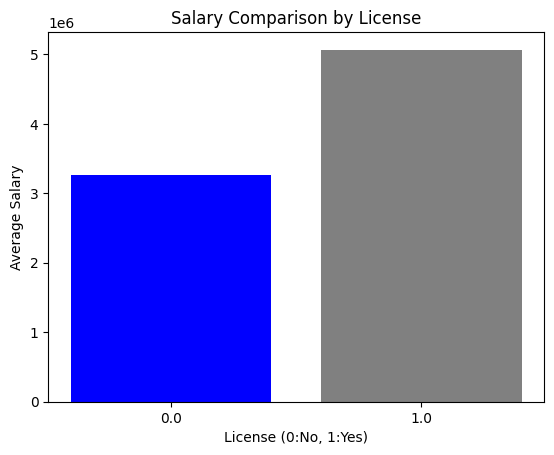

In [24]:
# グラフを描画
plt.bar(result['licence(資格)'].astype(str), result['avg_price'], color=['gray', 'blue'])
plt.xlabel('License (0:No, 1:Yes)')
plt.ylabel('Average Salary')
plt.title('Salary Comparison by License')
plt.show()



,education(学歴),avg_price
1,不問,3.455556e+06
2,大卒,5.010000e+06
3,短大卒,2.800000e+06
4,高卒,3.761667e+06


/Users/kugakairi/dsprog2-1/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kugakairi/dsprog2-1/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21839 (\N{CJK UNIFIED IDEOGRAPH-554F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kugakairi/dsprog2-1/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kugakairi/dsprog2-1/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21330 (\N{CJK UNIFIED IDEOGRAPH-5352}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kugakairi/dsprog2-1/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152:

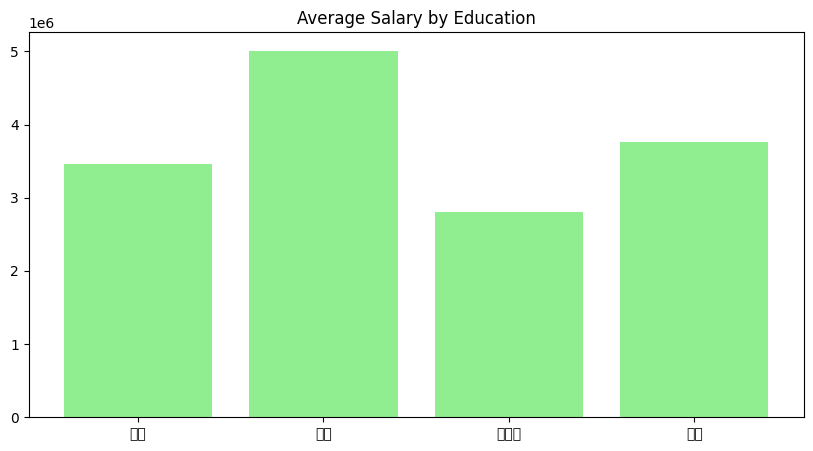

In [ ]:
# 1. 閉じてしまったDBに繋ぎ直す
db = sqlite3.connect("job_data.db")

# 2. SQLクエリを実行
query_edu = 'SELECT "education(学歴)", AVG("salary(給与・年収)") as avg_price FROM jobs GROUP BY "education(学歴)"'
result_edu = pd.read_sql_query(query_edu, db)

# 3. 結果を表示
clean_edu = result_edu.dropna()
display(clean_edu)

# グラフ表示する
plt.figure(figsize=(10, 5))
plt.bar(clean_edu['education(学歴)'].astype(str), clean_edu['avg_price'], color='lightgreen')
plt.title('Average Salary by Education')
plt.show()